In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Plot parameters
sns.set()
%pylab inline
pylab.rcParams['figure.figsize'] = (4, 4)

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Avoid inaccurate floating values (for inverse matrices in dot product for instance)
# See https://stackoverflow.com/questions/24537791/numpy-matrix-inversion-rounding-errors
np.set_printoptions(suppress=True)

In [4]:
%%html
<style>
.pquote {
  text-align: left;
  margin: 40px 0 40px auto;
  width: 70%;
  font-size: 1.5em;
  font-style: italic;
  display: block;
  line-height: 1.3em;
  color: #5a75a7;
  font-weight: 600;
  border-left: 5px solid rgba(90, 117, 167, .1);
  padding-left: 6px;
}
.notes {
  font-style: italic;
  display: block;
  margin: 40px 10%;
}
img + em {
  text-align: center;
  display: block;
  color: gray;
  font-size: 0.9em;
  font-weight: 600;
}
</style>

$$
\newcommand\bs[1]{\boldsymbol{#1}}
$$

<span class='notes'>
    This content is part of a series following the chapter 2 on linear algebra from the [Deep Learning Book](http://www.deeplearningbook.org/) by Goodfellow, I., Bengio, Y., and Courville, A. (2016). It aims to provide intuitions/drawings/python code on mathematical theories and is constructed as my understanding of these concepts. You can check the syllabus in the [introduction post](https://hadrienj.github.io/posts/Deep-Learning-Book-Series-Introduction/).
</span>

# Introduction

This chapter is light but contains some important definitions. The identity matrix or the inverse of a matrix are concepts that will be very useful in the next chapters. We will see at the end of this chapter that we can solve systems of linear equations by using the inverse matrix. So hang on!

# 2.3 Identity and Inverse Matrices


# Identity matrices

The identity matrix $\bs{I}_n$ is a special matrix of shape ($n \times n$) that is filled with $0$ except the diagonal that is filled with 1.

<img src="images/identity-matrix.png" width="150" alt="Example of an identity matrix" title="Identity matrix">
<em>A 3 by 3 identity matrix</em>

An identity matrix can be created with the Numpy function `eye()`:

In [5]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

When 'apply' the identity matrix to a vector the result is this same vector:

$$\bs{I}_n\bs{x} = \bs{x}$$

### Example 1.

$$
\begin{bmatrix}
    1 & 0 & 0 \\\\
    0 & 1 & 0 \\\\
    0 & 0 & 1
\end{bmatrix}
\times
\begin{bmatrix}
    x_{1} \\\\
    x_{2} \\\\
    x_{3}
\end{bmatrix}=
\begin{bmatrix}
    1 \times x_1 + 0 \times x_2 + 0\times x_3 \\\\
    0 \times x_1 + 1 \times x_2 + 0\times x_3 \\\\
    0 \times x_1 + 0 \times x_2 + 1\times x_3
\end{bmatrix}=
\begin{bmatrix}
    x_{1} \\\\
    x_{2} \\\\
    x_{3}
\end{bmatrix}
$$

In [6]:
x = np.array([[2], [6], [3]])
x

array([[2],
       [6],
       [3]])

In [7]:
xid = np.eye(x.shape[0]).dot(x)
xid

array([[2.],
       [6.],
       [3.]])

## Intuition

You can think of a matrix as a way to transform objects in a $n$-dimensional space. It applies a linear transformation of the space. We can say that we *apply* a matrix to an element: this means that we do the dot product between this matrix and the element (more details about the dot product in [2.2](https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.2-Multiplying-Matrices-and-Vectors/)). We will see this notion thoroughly in the next chapters but the identity matrix is a good first example. It is a particular example because the space doesn't change when we *apply* the identity matrix to it.

<span class='pquote'>
    The space doesn't change when we *apply* the identity matrix to it
</span>

We saw that $\bs{x}$ was not altered after being multiplied by $\bs{I}$.

# Inverse Matrices

The matrix inverse of $\bs{A}$ is denoted $\bs{A}^{-1}$. It is the matrix that results in the identity matrix when it is multiplied by $\bs{A}$:

$$\bs{A}^{-1}\bs{A}=\bs{I}_n$$

This means that if we apply a linear transformation to the space with $\bs{A}$, it is possible to go back with $\bs{A}^{-1}$. It provides a way to cancel the transformation.

### Example 2.

$$
\bs{A}=\begin{bmatrix}
    3 & 0 & 2 \\\\
    2 & 0 & -2 \\\\
    0 & 1 & 1
\end{bmatrix}
$$

For this example, we will use the Numpy function `linalg.inv()` to calculate the inverse of $\bs{A}$. Let's start by creating $\bs{A}$:

In [8]:
A = np.array([[3, 0, 2], [2, 0, -2], [0, 1, 1]])
A

array([[ 3,  0,  2],
       [ 2,  0, -2],
       [ 0,  1,  1]])

Now we calculate its inverse:

In [9]:
A_inv = np.linalg.inv(A)
A_inv

array([[ 0.2,  0.2,  0. ],
       [-0.2,  0.3,  1. ],
       [ 0.2, -0.3, -0. ]])

We can check that $\bs{A_{inv}}$ is well the inverse of $\bs{A}$ with Python:

In [10]:
A_bis = A_inv.dot(A)
A_bis

array([[ 1.,  0., -0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

We will see that inverse of matrices can be very usefull, for instance to solve a set of linear equations. We must note however that non square matrices (matrices with more columns than rows or more rows than columns) don't have inverse.

# Sovling a system of linear equations

An introduction on system of linear equations can be found in [2.2](https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.2-Multiplying-Matrices-and-Vectors/).

The inverse matrix can be used to solve the equation $\bs{Ax}=\bs{b}$ by adding it to each term:

$$\bs{A}^{-1}\bs{Ax}=\bs{A}^{-1}\bs{b}$$

Since we know by definition that $\bs{A}^{-1}\bs{A}=\bs{I}$, we have:

$$\bs{I}_n\bs{x}=\bs{A}^{-1}\bs{b}$$

We saw that a vector is not changed when multiplied by the identity matrix. So we can write:

$$\bs{x}=\bs{A}^{-1}\bs{b}$$

This is great! We can solve a set of linear equation just by computing the inverse of $\bs{A}$ and apply this matrix to the vector of results $\bs{b}$!

Let's try that!

### Example 3.

We will take a simple solvable example:

$$
\begin{cases}
y = 2x \\\\
y = -x +3
\end{cases}
$$

We will use the notation that we saw in [2.2](https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.2-Multiplying-Matrices-and-Vectors/):

$$
\begin{cases}
A_{1,1}x_1 + A_{1,2}x_2 = b_1 \\\\
A_{2,1}x_1 + A_{2,2}x_2= b_2
\end{cases}
$$

Here, $x_1$ corresponds to $x$ and $x_2$ corresponds to $y$. So we have:

$$
\begin{cases}
2x_1 - x_2 = 0 \\\\
x_1 + x_2= 3
\end{cases}
$$

Our matrix $\bs{A}$ of weights is:

$$
\bs{A}=
\begin{bmatrix}
    2 & -1 \\\\
    1 & 1
\end{bmatrix}
$$

And the vector $\bs{b}$ containing the solutions of individual equations is:

$$
\bs{b}=
\begin{bmatrix}
    0 \\\\
    3
\end{bmatrix}
$$

Under the matrix form, our systems becomes:

$$
\begin{bmatrix}
    2 & -1 \\\\
    1 & 1
\end{bmatrix}
\begin{bmatrix}
    x_1 \\\\
    x_2
\end{bmatrix}=
\begin{bmatrix}
    0 \\\\
    3
\end{bmatrix}
$$

Let's find the inverse of $\bs{A}$:

In [11]:
A = np.array([[2, -1], [1, 1]])
A

array([[ 2, -1],
       [ 1,  1]])

In [12]:
A_inv = np.linalg.inv(A)
A_inv

array([[ 0.33333333,  0.33333333],
       [-0.33333333,  0.66666667]])

We have also:

In [13]:
b = np.array([[0], [3]])

Since we saw that

$$\bs{x}=\bs{A}^{-1}\bs{b}$$

We have:

In [14]:
x = A_inv.dot(b)
x

array([[1.],
       [2.]])

This is our solution! 

$$
\bs{x}=
\begin{bmatrix}
    1 \\\\
    2
\end{bmatrix}
$$

This means that the point of coordinates (1, 2) is the solution and is at the intersection of the lines representing the equations. Let's plot them to check this solution:

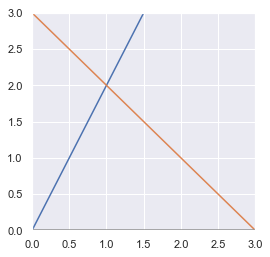

In [15]:
x = np.arange(-10, 10)
y = 2*x
y1 = -x + 3

plt.figure()
plt.plot(x, y)
plt.plot(x, y1)
plt.xlim(0, 3)
plt.ylim(0, 3)
# draw axes
plt.axvline(x=0, color='grey')
plt.axhline(y=0, color='grey')
plt.show()
plt.close()

We can see that the solution (corresponding to the line crossing) is when $x=1$ and $y=2$. It confirms what we found with the matrix inversion!

## BONUS: Coding tip - Draw an equation

To draw the equation with Matplotlib, we first need to create a vector with all the $x$ values. Actually, since this is a line, only two points would have been sufficient. But with more complex functions, the length of the vector $x$ corresponds to the sampling rate. So here we used the Numpy function `arrange()` (see the [doc](https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html)) to create a vector from $-10$ to $10$ (not included).

In [16]:
np.arange(-10, 10)

array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
         3,   4,   5,   6,   7,   8,   9])

The first argument is the starting point and the second the ending point. You can add a third argument to specify the step:

In [17]:
np.arange(-10, 10, 2)

array([-10,  -8,  -6,  -4,  -2,   0,   2,   4,   6,   8])

Then we create a second vector $y$ that depends on the $x$ vector. Numpy will take each value of $x$ and apply the equation formula to it.

In [18]:
x = np.arange(-10, 10)
y = 2*x + 1
y

array([-19, -17, -15, -13, -11,  -9,  -7,  -5,  -3,  -1,   1,   3,   5,
         7,   9,  11,  13,  15,  17,  19])

Finally, you just need to plot these vectors.

# Singular matrices

Some matrices are not invertible. They are called **singular**.

# Conclusion

This introduces different cases according to the linear system because $\bs{A}^{-1}$ exists only if the equation $\bs{Ax}=\bs{b}$ has one and only one solution. [The next chapter](https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.4-Linear-Dependence-and-Span/) is almost all about systems of linear equations and number of solutions.

<span class='notes'>
    Feel free to drop me an email or a comment. The syllabus of this series can be found [in the introduction post](https://hadrienj.github.io/posts/Deep-Learning-Book-Series-Introduction/). All the notebooks can be found on [Github](https://github.com/hadrienj/deepLearningBook-Notes).
</span>